# Assignment 3

In [1]:
import otter
grader = otter.Notebook()
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plots
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

### Assignment instructions

* **How to install 'otter'**: Run `pip install otter-grader` in your Anaconda Command Prompt
* **Otter**: It is an autograder that we will be using for grading your notebooks.
* **grader.check('qn')**: This command runs test cases for nth question `qn` provided to you and displays the result. But these are not the only test cases, these are provided just for your basic testing. There will be some *hidden test cases* on which your answers will be tested as well.
* You are **not** allowed to edit any pre-defined variables and as per the instructions for every question you have to assign your answers to these variables.

### Submission instructions

* Rename your notebook as **YourRollNumber_Part2.ipynb**. (e.g. *`2XXXXXXX_Part2.ipynb`*)
* Download your notebook as a PDF and rename it to **YourRollNumber_Part2.pdf**
* Only submit your notebook and PDF in a zip file named **YourRollNumber_DA3.zip** on LMS

## Dataset
Education is a critical determinant of future success, and one of the key factors that influence academic performance is class attendance. In this dataset, we aim to explore how different factors, such as attendance, extracurricular involvement, and study habits, may impact students' grades.

It is often suggested that attending classes above a certain threshold can have a positive effect on academic performance. However, a thorough analysis is required to confirm this hypothesis. In this assignment, we will use a dataset that includes several attributes of students, such as gender, high school type, weekly study hours, and attendance records, to investigate the factors contributing to student success.

For simplicity, this dataset contains information about approximately 120 students, with various features related to their academic and personal backgrounds. Each row represents a student and their academic history.

In [2]:
df = pd.read_csv("student_performance_data.csv")

## Data summary

Each row in this dataset represents a student with specific academic and personal history. We are interested in examining whether attending classes above the required percentage had any effect on whether or not they received good grades. Several attributes of the students are stored in this dataset:

- **student_id**: The student's unique ID for the study.
- **gender**:  The gender of the student, either 'Male' or 'Female'.
- **student_age**: The student's age at the time of the study.
- **high_school_type**: The type of high school the student attended, categorized as 'Other', 'State', or 'Private'.
- **scholarship**:  The percentage of scholarship received by the student, ranging from '25%', '50%', '75%', '100%', or 'No' scholarship.
- **sleep_quality**: The student's reported quality of sleep, categorized as 'Good' or 'Poor'.
- **involvement_in_extracurriculars**: Whether the student is involved in extracurricular activities, with values 'Yes' or 'No'.
- **weekly_study_hours**: The average number of hours the student studies per week.
- **attendance**: Whether the student’s attendance is above or below the required threshold, categorized as 'Above' or 'Below'.
- **assignments_completed**: Whether the student completed all course assignments, categorized as 'Yes' or 'No'.
- **attended_tutorials**: Whether the student attended tutorials, categorized as 'Yes' or 'No'.
- **grade**: The student's final grade

## Data cleaning

**Question 1**: A student's `id` is unimportant to us. Drop this column.

In [3]:
df.columns

Index(['student_id', 'student_age', 'gender', 'high_school_type',
       'scholarship', 'sleep_quality', 'involvement_in_extracurriculars',
       'weekly_study_hours', 'attendance', 'assignments_completed',
       'attended_tutorials', 'grade'],
      dtype='object')

In [4]:
# code here
df = df.drop("student_id", axis=1)


In [5]:
grader.check("q1")

results: All test cases passed!

**Question 2**: We are working with numerical data, so you are required to convert age ranges to midpoint values. To help with this, write a Python function `convert_age_to_midpoint` that takes an `age_range` as input.

- If the `age_range` is a range (e.g., `'20-25'`), the function should return the midpoint of the range.
- If the `age_range` is a single value (e.g., `'30'`), the function should return that value as an integer.

Next, apply this function to the `student_age` column in a pandas DataFrame to convert all values into midpoints.


In [6]:
df.dtypes

student_age                        object
gender                             object
high_school_type                   object
scholarship                        object
sleep_quality                      object
involvement_in_extracurriculars    object
weekly_study_hours                  int64
attendance                         object
assignments_completed              object
attended_tutorials                 object
grade                              object
dtype: object

In [7]:
df.head(3)

,student_age,gender,high_school_type,scholarship,sleep_quality,involvement_in_extracurriculars,weekly_study_hours,attendance,assignments_completed,attended_tutorials,grade
0,19-22,Male,Other,50%,Good,No,0,Above,Yes,Yes,A+
1,19-22,Male,Other,50%,Good,No,0,Above,Yes,No,A+
2,19-22,Male,State,50%,Poor,No,2,Below,No,No,A+


In [8]:
def convert_age_to_midpoint(age_range):
    if '-' in age_range:
        
        parts = age_range.split('-')
        lower = int(parts[0])
        upper = int(parts[1])
        
        return (lower + upper) / 2
    else:
      
        return int(age_range)
    
    
df['student_age'] = df['student_age'].apply(convert_age_to_midpoint)

In [9]:
df.head(5)

,student_age,gender,high_school_type,scholarship,sleep_quality,involvement_in_extracurriculars,weekly_study_hours,attendance,assignments_completed,attended_tutorials,grade
0,20.5,Male,Other,50%,Good,No,0,Above,Yes,Yes,A+
1,20.5,Male,Other,50%,Good,No,0,Above,Yes,No,A+
2,20.5,Male,State,50%,Poor,No,2,Below,No,No,A+
3,18.0,Female,Private,50%,Good,No,2,Above,No,Yes,A+
4,20.5,Male,Private,50%,Poor,No,12,Above,Yes,No,A+


In [10]:
grader.check("q2")

results: All test cases passed!

### Question 3:

**Question 3**: Similarly, convert the data entries to numerical data as decribed below. 

- **gender**: 1 if 'Male' and 0 if 'Female'
- **high_school_type**: 0 if 'Other', 1 if 'State', and 2 if 'Private'
- **scholarship**: 0.25 for '25%', 0.5 for '50%', 0.75 for '75%', 1 for '100%', and 0 if 'No'
- **sleep_quality**: 1 if 'Good', and 0 if 'Poor'
- **involvement_in_extracurriculars**: 1 if 'Yes', and 0 if 'No'
- **attendance**: 1 if 'Above', and 0 if 'Below'
- **assignments_completed**: 1 if 'Yes', and 0 if 'No'
- **attended_tutorials**: 1 if 'Yes', and 0 if 'No'
- **grade**: Convert letter grades into numeric values as follows:
    - 'A+' = 4.0
    - 'A' = 3.7
    - 'B+' = 3.3
    - 'B' = 3.0
    - 'C+' = 2.3
    - 'C' = 2.0
    - 'D' = 1.0
    - 'F' = 0.0

In [11]:
# Dictionary mappings
gender_map = {'Male': 1, 'Female': 0}
high_school_map = {'Other': 0, 'State': 1, 'Private': 2}
scholarship_map = {'25%': 0.25, '50%': 0.5, '75%': 0.75, '100%': 1, 'No': 0}
sleep_quality_map = {'Good': 1, 'Poor': 0}
yes_no_map = {'Yes': 1, 'No': 0}
attendance_map = {'Above': 1, 'Below': 0}
grade_map = {
    'A+': 4.0, 'A': 3.7, 'B+': 3.3, 'B': 3.0,
    'C+': 2.3, 'C': 2.0, 'D': 1.0, 'F': 0.0
}

# Applying the mappings to the DataFrame
df['gender'] = df['gender'].map(gender_map)
df['high_school_type'] = df['high_school_type'].map(high_school_map)
df['scholarship'] = df['scholarship'].map(scholarship_map)
df['sleep_quality'] = df['sleep_quality'].map(sleep_quality_map)
df['involvement_in_extracurriculars'] = df['involvement_in_extracurriculars'].map(yes_no_map)
df['attendance'] = df['attendance'].map(attendance_map)
df['assignments_completed'] = df['assignments_completed'].map(yes_no_map)
df['attended_tutorials'] = df['attended_tutorials'].map(yes_no_map)
df['grade'] = df['grade'].map(grade_map)




In [12]:
grader.check("q3")

results: All test cases passed!

## Exploratory Data Analysis

We are interested in examining how different groups of students are impacted by attending classes above the required threshold. The `attendance` variable is 1 if the student’s attendance is above the threshold (i.e., 'Above').

**Question 5:** 

a) Complete the function given below. Given a column name and dataframe, `treatment_plot` should plot the estimated average treatment effect for **all** groups of that column variable. 

b) What do you observe in your treatment plot for the column `gender`? Write your answer as a comment.

In [13]:
def treatment_plot(data, col, x_labels=None):
   
    treated_outcomes = data[data['attendance'] == 1].groupby(col)['grade'].mean()
    untreated_outcomes = data[data['attendance'] == 0].groupby(col)['grade'].mean()

    # Merge treated and untreated outcomes on the grouping column
    ate_df = pd.DataFrame({
        'treated_outcome': treated_outcomes,
        'untreated_outcome': untreated_outcomes
    }).reset_index()

    # Calculate the ATE as the difference between treated and untreated outcomes
    ate_df['ATE'] = ate_df['treated_outcome'] - ate_df['untreated_outcome']
    
    # Plot the results 
    plt.figure(figsize=(10, 6))
    sns.barplot(x=col, y='ATE', data=ate_df, palette='viridis')
    
   
    if x_labels:
        plt.xticks(ticks=range(len(ate_df)), labels=x_labels)
    
    plt.title(f'Average Treatment Effect by {col}')
    plt.xlabel(col)
    plt.ylabel('Estimated ATE')
    plt.show()
    
    


C:\Users\sehar\AppData\Local\Temp\ipykernel_1592\3255747403.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='ATE', data=ate_df, palette='viridis')


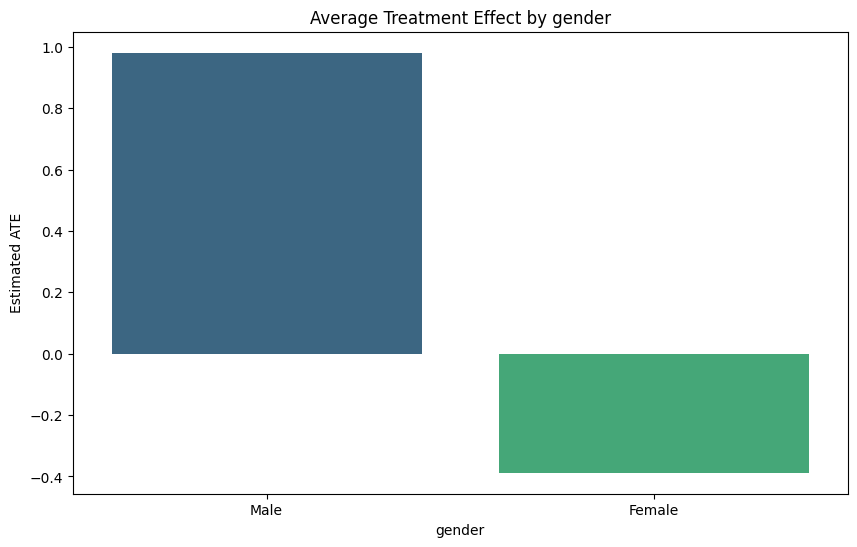

In [14]:
treatment_plot(data=df, col='gender', x_labels=['Male', 'Female'])

Males have a positive ATE close to 1, indicating that the treatment had a significant positive effect on this group.
Females, on the other hand, have a negative ATE of around -0.3, suggesting that the treatment actually had an adverse or opposite effect on this group. This discrepancy implies that the treatment’s effectiveness varies substantially between genders. While males benefited significantly from the treatment, females either did not benefit or were negatively impacted.

**Question 6:** 

a) Plot a correlation heatmap for this dataset (it should be a color coded graph indicating correlation values for each of the columns against every other column).

b) Comment on any notable correlations. For any of these pairs, answer the following questions: Are they causally related? If so, is their causal relationship direct or indirect? Name any confounding variables you suspect. If you do not think they are causally related, comment why.

Note: You will be graded on how critically you have commented, not how much you write. So keep your answers crisp and to the point, but also think deeply.

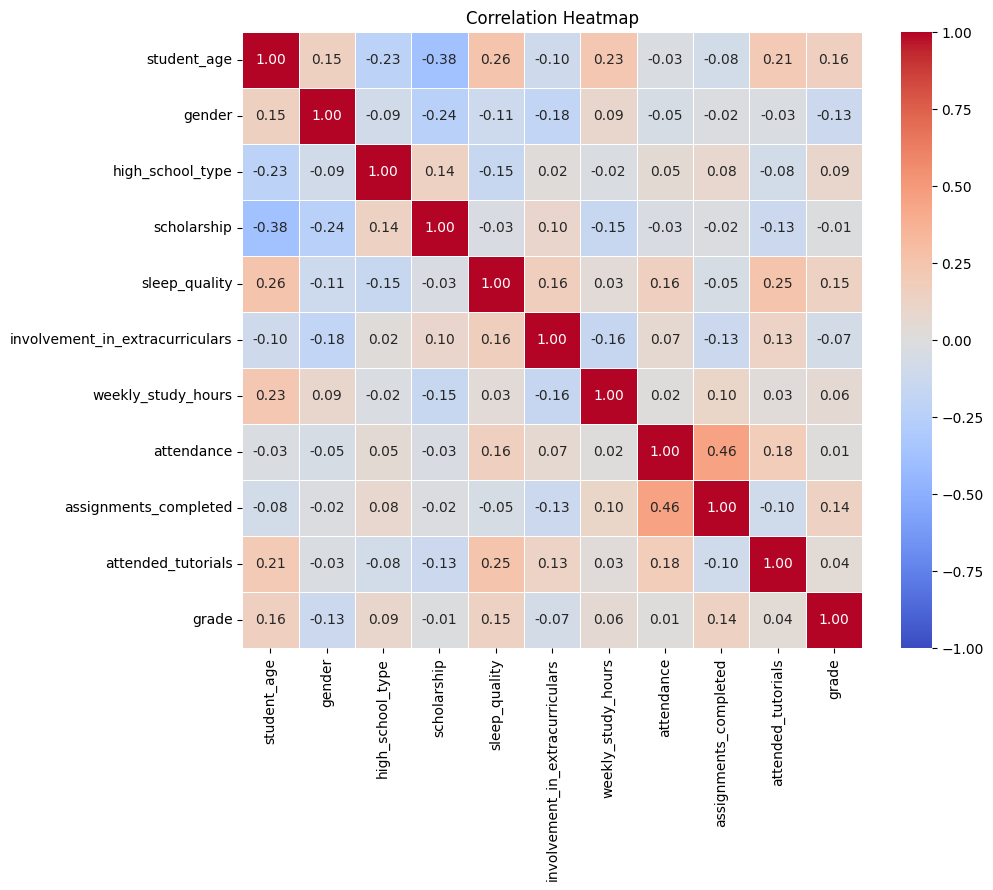

In [15]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

1. Attendance and Assignments Completed (Correlation: 0.46)
Yes, likely a causal relationship. The more a student attends classes, the more likely they are to complete assignments. This relationship is relatively direct since attendance usually improves access to the material and guidance needed for assignments.Factors such as access to resources could influence both attendance and assignment completion, thereby acting as confounders.

2. Sleep Quality and Attended Tutorials (Correlation: 0.25)
This is more likely to be an indirect relationship. Better sleep quality could enhance a student's alertness and energy levels, making them more willing to attend extra tutorials. Stress levels, or time management skills might influence both sleep quality and participation in tutorials.

3. Gender and Grade (Correlation: -0.13)
The relationship is not necessarily causal but could reflect underlying biases or differences in educational engagement between genders. It’s more likely that external factors such as  teaching styles, or subject preferences might impact performance.

4. Weekly Study Hours and Grade (Correlation: 0.15)
Causal Relationship: Yes, potentially causal but likely indirect. More study hours could lead to better grades, but the effectiveness of those hours matters more than the quantity. Cofounding factors could be sleep quality (as better sleep could contribute to more effective study hours). Moreover, motivation could also be a cofounding factor



## The Effect of Attendance Above the Required Threshold(Treatment)

**Question 7:** 

a) Find the overall estimated average treatment effect (under certain assumptions) of attending classes. Store it in the variable `estimated_ATE`.
Note: Your test case may pass even if your value has the wrong sign.

b) Is your result positive or negative? What do the sign (+ve or -ve) and magnitude of your result tell you about the effect of attending classes? Write your answer as a comment.

In [16]:

estimated_ATE = df[df['attendance'] == 1]['grade'].mean() - df[df['attendance'] == 0]['grade'].mean()


In [17]:
print(estimated_ATE)

0.035034013605442116


b) attending classes has a beneficial effect on grades, but the effect is modest as the magnitude is low.

In [18]:
grader.check("q7")

results: All test cases passed!

c) Does this value reflect the actual accurate treatment effect (effect of attending classes above the required threshold) in our population? If not, under what assumptions will this be an accurate representation of the actual ATE?

This value may not accurately represent the true treatment effect due to potential biases and confounding factors. For example, sleep_quality, assignment_submission, attended_tutorials could be cofounding factors. To get a more accurate estimate, we would need to adjust for confounders.

**Question 8**: Does this estimated average treatment effect make sense to you or are we missing something? Explore the data further and look at the distribution of different groups of students (i.e., students having different values for different attributes) across the treatment and control groups. Comment on how this distribution **may** impact your observed ATE.

Means of numerical columns for treatment and control groups:

Treatment group means:
gender                             0.653061
scholarship                        0.649485
sleep_quality                      0.336735
involvement_in_extracurriculars    0.367347
weekly_study_hours                 2.163265
assignments_completed              0.642857
attended_tutorials                 0.571429
dtype: float64

Control group means:
gender                             0.714286
scholarship                        0.666667
sleep_quality                      0.142857
involvement_in_extracurriculars    0.285714
weekly_study_hours                 2.000000
assignments_completed              0.047619
attended_tutorials                 0.333333
dtype: float64

Distribution of gender in treatment vs control groups:
Treatment group:
gender
1    0.653061
0    0.346939
Name: proportion, dtype: float64
Control group:
gender
1    0.714286
0    0.285714
Name: proportion, dtype: float64

Distribution of schola

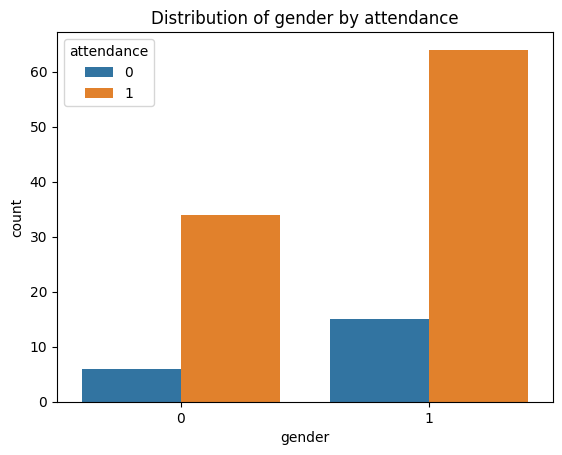

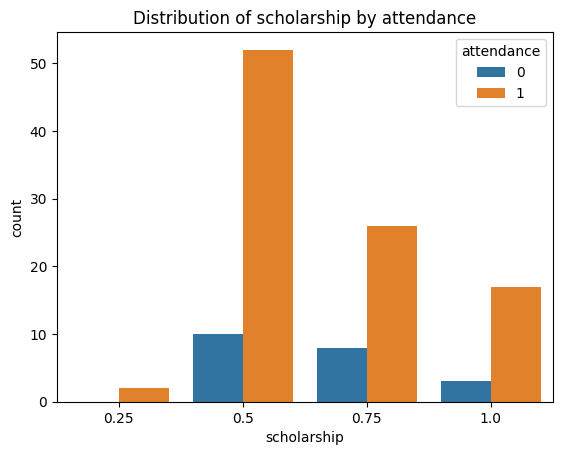

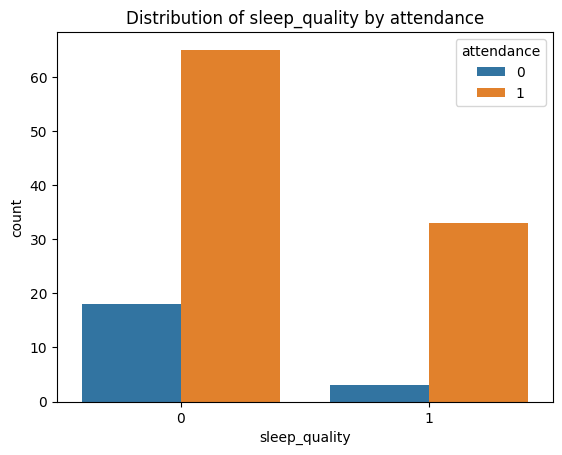

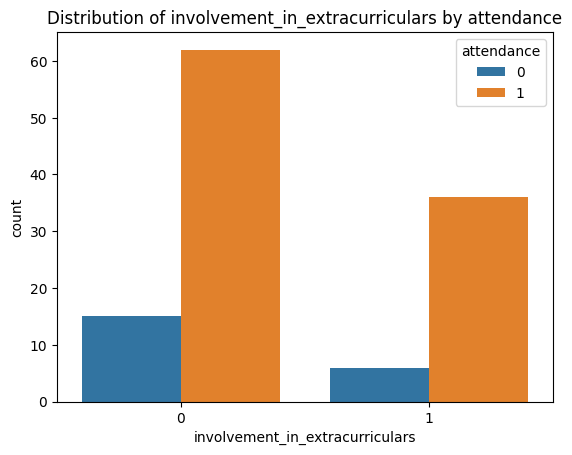

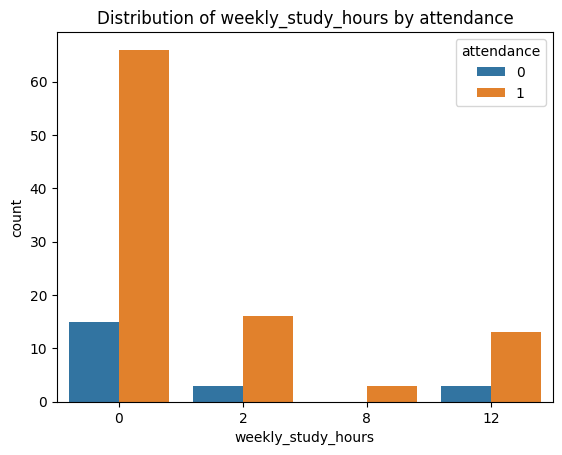

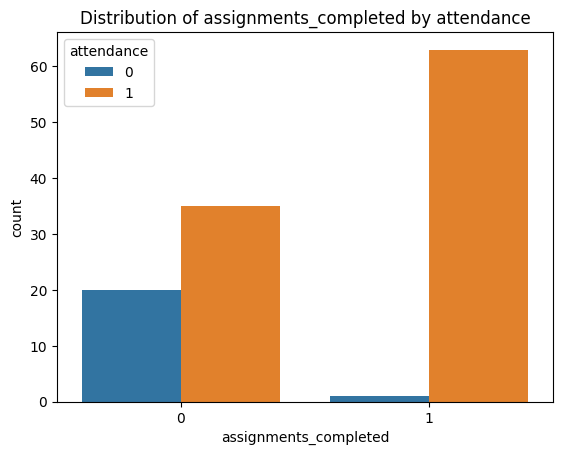

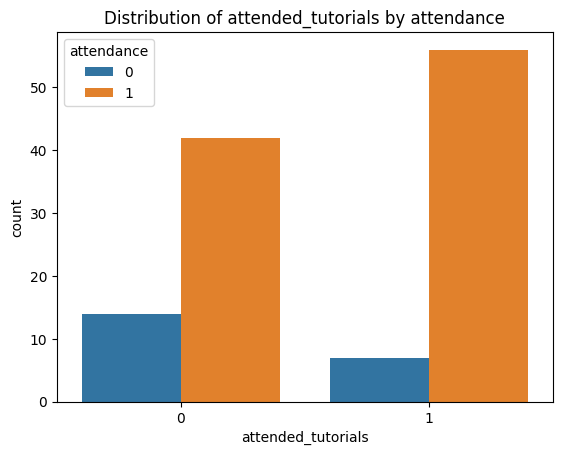

In [19]:

# List of columns to check distribution
columns_to_check = [
    'gender', 'scholarship', 'sleep_quality', 
    'involvement_in_extracurriculars', 'weekly_study_hours', 
    'assignments_completed', 'attended_tutorials'
]

# Separate treatment and control groups
treatment_group = df[df['attendance'] == 1]
control_group = df[df['attendance'] == 0]

# Compare means for numerical columns
print("Means of numerical columns for treatment and control groups:")
print("\nTreatment group means:")
print(treatment_group[columns_to_check].mean())
print("\nControl group means:")
print(control_group[columns_to_check].mean())

# Check distributions of categorical columns
for col in ['gender', 'scholarship', 'sleep_quality']:
    print(f"\nDistribution of {col} in treatment vs control groups:")
    print("Treatment group:")
    print(treatment_group[col].value_counts(normalize=True))
    print("Control group:")
    print(control_group[col].value_counts(normalize=True))

# Visualize distributions using bar plots for categorical variables
for col in columns_to_check:
    sns.countplot(x=col, hue='attendance', data=df)
    plt.title(f"Distribution of {col} by attendance")
    plt.show()


The graph do show that other atributes have an effect on grades. For example students who completed assignments were mostly who attended lectures. I also see that attendence 0 (poor attendence) is a just minority no of students - i don't know yet how it effects our results but something to consider.

**Question 9a**: Now write code to find the estimated treatment effect separately within the different groups you explored above. What do your observations tell you? Do you think Simpson's Paradox can be seen manifesting in these observations? If you do observe Simpson's paradox, adjust for these covariates and report the conditional average treatment effect.

In [20]:
def calculate_ate_by_group(df, group_col):
    groups = df[group_col].unique()
    results = {}
    
    # Calculate ATE within each subgroup
    for group in groups:
        group_df = df[df[group_col] == group]
        treated_mean = group_df[group_df['attendance'] == 1]['grade'].mean()
        control_mean = group_df[group_df['attendance'] == 0]['grade'].mean()
        ate = treated_mean - control_mean
        results[group] = ate
        print(f"ATE for {group_col} = {group}: {ate:.4f}")
    
    return results


# Calculate ATE for each group
ate_results = {}
for col in columns_to_check:
    print(f"\nCalculating ATE by {col}:")
    ate_results[col] = calculate_ate_by_group(df, col)


Calculating ATE by gender:
ATE for gender = 1: -0.3880
ATE for gender = 0: 0.9814

Calculating ATE by scholarship:
ATE for scholarship = 0.5: 0.0815
ATE for scholarship = 0.75: -0.1385
ATE for scholarship = 1.0: -0.5471
ATE for scholarship = 0.25: nan
ATE for scholarship = nan: nan

Calculating ATE by sleep_quality:
ATE for sleep_quality = 1: -0.6939
ATE for sleep_quality = 0: 0.0950

Calculating ATE by involvement_in_extracurriculars:
ATE for involvement_in_extracurriculars = 0: 0.0322
ATE for involvement_in_extracurriculars = 1: 0.0889

Calculating ATE by weekly_study_hours:
ATE for weekly_study_hours = 0: 0.0330
ATE for weekly_study_hours = 2: -0.8375
ATE for weekly_study_hours = 12: 0.7974
ATE for weekly_study_hours = 8: nan

Calculating ATE by assignments_completed:
ATE for assignments_completed = 1: -0.6524
ATE for assignments_completed = 0: -0.1443

Calculating ATE by attended_tutorials:
ATE for attended_tutorials = 1: -0.0429
ATE for attended_tutorials = 0: 0.0476


yes there is simpson's paradox. for eg Sleep Quality:

Students with sleep_quality = 1 (good sleep) have a negative ATE of -0.6939.
Students with sleep_quality = 0 (poor sleep) have a positive ATE of 0.0950.
This is  case where the overall effect might appear positive, but the effect varies significantly depending on sleep quality.

**Question 9b**: Now we want to explore the effect of conditioning on certain attributes on the overall estimated ATE. Condition on at least 3 attributes from the dataset *one by one* to report how the estimated ATE changes (this will require trial and error). For example, in the first step, condition on attribute *x*. In the next step, condition on some *x* and *y* together, and so on.

Report on your observations. How does the ATE change with every step? What does this tell you about the effect of these attributes on the probability of getting good grades among students who attend classes above the required percentage and those who attend classes below the required percentage.

Hint: refer to lecture slides to see how you can adjust for covariates to find a conditional ATE.

In [21]:
# Calculate ATE conditioned on weekly study hours
median_study_hours = df['weekly_study_hours'].median()

# Group 1: Students with weekly study hours above the median
treated_high_study = df[(df['attendance'] == 1) & (df['weekly_study_hours'] > median_study_hours)]['grade'].mean()
untreated_high_study = df[(df['attendance'] == 0) & (df['weekly_study_hours'] > median_study_hours)]['grade'].mean()
ate_high_study = treated_high_study - untreated_high_study

# Group 2: Students with weekly study hours below the median
treated_low_study = df[(df['attendance'] == 1) & (df['weekly_study_hours'] <= median_study_hours)]['grade'].mean()
untreated_low_study = df[(df['attendance'] == 0) & (df['weekly_study_hours'] <= median_study_hours)]['grade'].mean()
ate_low_study = treated_low_study - untreated_low_study

print(f"Conditional ATE (High Study Hours): {ate_high_study:.4f}")
print(f"Conditional ATE (Low Study Hours): {ate_low_study:.4f}")


Conditional ATE (High Study Hours): 0.0083
Conditional ATE (Low Study Hours): 0.0330


In [22]:
# Calculate ATE conditioned on attending tutorials
treated_tutorials = df[(df['attendance'] == 1) & (df['attended_tutorials'] == 1)]['grade'].mean()
untreated_tutorials = df[(df['attendance'] == 0) & (df['attended_tutorials'] == 1)]['grade'].mean()
ate_tutorials = treated_tutorials - untreated_tutorials

treated_no_tutorials = df[(df['attendance'] == 1) & (df['attended_tutorials'] == 0)]['grade'].mean()
untreated_no_tutorials = df[(df['attendance'] == 0) & (df['attended_tutorials'] == 0)]['grade'].mean()
ate_no_tutorials = treated_no_tutorials - untreated_no_tutorials

print(f"Conditional ATE (Attended Tutorials): {ate_tutorials:.4f}")
print(f"Conditional ATE (Did Not Attend Tutorials): {ate_no_tutorials:.4f}")


Conditional ATE (Attended Tutorials): -0.0429
Conditional ATE (Did Not Attend Tutorials): 0.0476


In [23]:

treated_sleep = df[(df['attendance'] == 1) & (df['sleep_quality'] == 1)]['grade'].mean()
untreated_sleep = df[(df['attendance'] == 0) & (df['sleep_quality'] == 1)]['grade'].mean()
ate_sleep = treated_sleep - untreated_sleep

treated_no_sleep = df[(df['attendance'] == 1) & (df['sleep_quality'] == 0)]['grade'].mean()
untreated_no_sleep = df[(df['attendance'] == 0) & (df['sleep_quality'] == 0)]['grade'].mean()
ate_no_sleep = treated_no_sleep - untreated_no_sleep

print(f"Conditional ATE (With sleep): {ate_sleep:.4f}")
print(f"Conditional ATE (Without sleep): {ate_no_sleep:.4f}")


Conditional ATE (With sleep): -0.6939
Conditional ATE (Without sleep): 0.0950


In [24]:
# code here
# Conditional ATE with combined attributes: weekly_study_hours and attended_tutorials
treated_combined = df[(df['attendance'] == 1) & 
                      (df['weekly_study_hours'] > median_study_hours) & 
                      (df['attended_tutorials'] == 1)]['grade'].mean()
untreated_combined = df[(df['attendance'] == 0) & 
                        (df['weekly_study_hours'] > median_study_hours) & 
                        (df['attended_tutorials'] == 1)]['grade'].mean()
ate_combined = treated_combined - untreated_combined

print(f"Conditional ATE (High Study Hours & Attended Tutorials): {ate_combined:.4f}")


Conditional ATE (High Study Hours & Attended Tutorials): 0.5490


The initial Average Treatment Effect (ATE) of attending classes on grades is 0.0350, indicating a small positive effect overall. When conditioning on specific factors, the ATE varies: for students with high study hours, the effect is almost negligible (0.0083), suggesting that their grades are already supported by study time. For students with low study hours, the effect is modest but positive (0.0330), indicating that attending classes may help compensate for less study. Students who attended tutorials showed a negative ATE (-0.0429), possibly reflecting struggles that classes alone can't improve. Conversely, students who did not attend tutorials had a slightly higher positive ATE (0.0476), suggesting classes are more beneficial for them. Finally, when both high study hours and attending tutorials are considered together, the ATE jumps significantly to 0.5490, highlighting that highly engaged students benefit the most from attending classes.

**Question 10:** 

a) Calculate the p-value for the treatment and store it in `p_value`.

b) Comment on the statistical significance of your result. What does this p-value say about attending classes and grades? Clearly state your null and alternative hypotheses and the significance level you have chosen for your p-value. Should you reject the null hypothesis?

Note: You are allowed to use scipy for calculating the p-value.

In [25]:
# Extract grades for the treatment and control groups
treated_grades = df[df['attendance'] == 1]['grade']
untreated_grades = df[df['attendance'] == 0]['grade']

# Perform a two-sample t-test
t_statistic, p_value = ttest_ind(treated_grades, untreated_grades)

# Display the result
print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

T-statistic: 0.1306
P-value: 0.8963


H0: attending lectures does not have an effect on grades
H1: attending lectures has a significant effect on grades

as p-value is greater than 0.05, we fail to reject the null hypothesis (H0). This means there is not enough evidence to conclude that attending lectures has a significant effect on grades.

In [26]:
grader.check("q10")

results: All test cases passed!

In [27]:
grader.check_all()

 results: All test cases passed!